<a href="https://colab.research.google.com/github/IsaacKelly99/IKR/blob/master/Pizza_clustering_and_recomendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pizza clients clustering
## ML Unsupervised learning

This time i created an unsupervised learning model to cluster the likes of 200 pizza clients, based on the ingredients they like, its spicyness, age, gender, etc. Using KMeans clustering

Other tools used:
*   Principal components analysis (PCA)
*   Standard Scaler
*   Label encoder
*   Matplotlib
*   Pandas
*   Numpy

Link to the kaggle dataset: https://www.kaggle.com/alibuttj/pizza-flavor-recommender-system

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [105]:
# Import the dataset
df = pd.read_excel("/content/drive/MyDrive/data_for_colab/Pizza Recommendation System(1-200).xlsx")

In [106]:
df

,ID,Start time,Completion time,Select your Gender :,Select your age :,How much spicy would you like your pizza to be?,Do you like Pepperoni ?,Which one do you prefer the most :,Do you Prefer Tomatoes?,Which one of these do you like ?,Do you like Capsicum ?,Which one of these you like ?,Do you like Peppers ?,Do you like Sauce :,Do you like Mushroom :,Do you like Pesto :,Do you like Cheese :,Have any Health or diet issue ?
0,1,2021-04-21 22:06:40,2021-04-21 22:07:03,Male,11-20,A little bit spicy,Yes,Marinated chicken,Yes,None,No,Both beef and Chicken,Yes,Yes,Yes,No,No,None;
1,2,2021-04-22 03:09:28,2021-04-22 03:10:41,Female,11-20,A little bit spicy,Yes,Marinated chicken,Yes,Black olives,Yes,Chicken,Yes,Yes,Yes,Yes,Yes,None;
2,3,2021-04-22 03:12:42,2021-04-22 03:13:58,Male,21-30,Moderate spicy,Yes,Marinated chicken,Yes,Green ripe olive,Yes,Both beef and Chicken,Yes,Yes,Yes,Yes,Yes,None;
3,4,2021-04-22 03:42:27,2021-04-22 03:44:19,Male,11-20,A little bit spicy,Yes,None,No,Black olives,No,Both beef and Chicken,No,Yes,Yes,No,Yes,None;
4,5,2021-04-22 03:46:31,2021-04-22 03:46:58,Male,21-30,Extra Spicy,No,None,Yes,None,No,Beef,Yes,Yes,Yes,Yes,No,Uric acid;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,2021-04-23 17:20:08,2021-04-23 17:23:17,Male,21-30,Moderate spicy,No,Marinated chicken,No,Black olives,No,Chicken,No,Yes,Yes,No,Yes,None;
196,197,2021-04-23 18:16:41,2021-04-23 18:17:33,Male,11-20,Mild,Yes,None,No,None,Yes,Chicken,Yes,Yes,Yes,No,No,Obesity;
197,198,2021-04-23 18:36:06,2021-04-23 18:36:49,Male,11-20,Mild,Yes,None,No,Black olives,No,Chicken,No,Yes,No,No,Yes,None;
198,199,2021-04-23 19:30:55,2021-04-23 19:33:10,Male,11-20,Moderate spicy,No,Marinated chicken,Yes,Black olives,Yes,Chicken,No,Yes,No,No,Yes,None;


In [107]:
# Lets check for Na's in our dataset
print(df.isna().sum())
# Theres one NA in the select your age column, lets impute it with the mode
age_mode = df["Select your age :"].mode()
print("age mode", age_mode)
df["Select your age :"].fillna(age_mode[0], inplace=True)
#lets check now if there are na's
print(df.isna().sum().sum())

ID                                                 0
Start time                                         0
Completion time                                    0
Select your Gender :                               0
Select your age :                                  1
How much spicy would you like your pizza to be?    0
Do you like Pepperoni ?                            0
Which one do you prefer the most :                 0
Do you Prefer Tomatoes?                            0
Which one of these do you like ?                   0
Do you like Capsicum ?                             0
Which one of these you like ?                      0
Do you like Peppers ?                              0
Do you like Sauce :                                0
Do you like Mushroom :                             0
Do you like Pesto :                                0
Do you like Cheese :                               0
Have any Health or diet issue ?                    0
dtype: int64
age mode 0    11-20
dtype: object

In [108]:
# We have many categorical columns, with many different values in each one, i need to encode those columns
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# Lets encode each column using fit_transform
df['Select your Gender :'] = encoder.fit_transform(df['Select your Gender :'].astype("category"))
df['Select your age :'] = encoder.fit_transform(df['Select your age :'].astype(str))
df['Select your age :'] = df['Select your age :'].astype("category")
df['How much spicy would you like your pizza to be?']= encoder.fit_transform(df['How much spicy would you like your pizza to be?'].astype("category"))
df.iloc[:,6]= encoder.fit_transform(df.iloc[:,6].astype("category"))
df['Which one do you prefer the most :']= encoder.fit_transform(df["Which one do you prefer the most :"].astype("category"))
df["Do you Prefer Tomatoes?"]= encoder.fit_transform(df["Do you Prefer Tomatoes?"].astype("category"))
df["Which one of these do you like ?"]= encoder.fit_transform(df["Which one of these do you like ?"].astype("category"))
df.iloc[:,10]= encoder.fit_transform(df.iloc[:,10].astype("category"))
df["Do you like Peppers ?"]= encoder.fit_transform(df["Do you like Peppers ?"].astype("category"))
df["Do you like Sauce :"]= encoder.fit_transform(df["Do you like Sauce :"].astype("category"))
df["Do you like Mushroom :"]= encoder.fit_transform(df["Do you like Sauce :"].astype("category"))
df["Do you like Pesto :"]= encoder.fit_transform(df["Do you like Pesto :"].astype("category"))
df["Do you like Cheese :"]= encoder.fit_transform(df["Do you like Cheese :"].astype("category"))
df["Have any Health or diet issue ?"]= encoder.fit_transform(df["Have any Health or diet issue ?"].astype("category"))
df["Which one of these you like ?"]= encoder.fit_transform(df["Which one of these you like ?"].astype("category"))
# Drop the timestamps and ID
df.drop(df.columns[[0, 1, 2]], axis = 1, inplace = True)
# The results
df.head()


,Select your Gender :,Select your age :,How much spicy would you like your pizza to be?,Do you like Pepperoni ?,Which one do you prefer the most :,Do you Prefer Tomatoes?,Which one of these do you like ?,Do you like Capsicum ?,Which one of these you like ?,Do you like Peppers ?,Do you like Sauce :,Do you like Mushroom :,Do you like Pesto :,Do you like Cheese :,Have any Health or diet issue ?
0,1,0,0,1,1,1,2,0,1,1,1,1,0,0,10
1,0,0,0,1,1,1,0,1,2,1,1,1,1,1,10
2,1,1,3,1,1,1,1,1,1,1,1,1,1,1,10
3,1,0,0,1,2,0,0,0,1,0,1,1,0,1,10
4,1,1,1,0,2,1,2,0,0,1,1,1,1,0,12


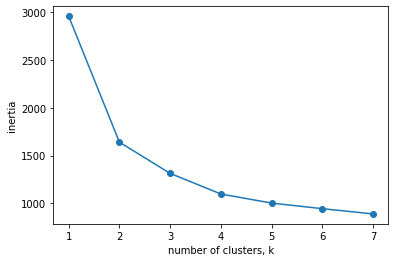

In [110]:
from sklearn.cluster import KMeans
# convert the dataset to a np.array, and assign it to the samples variables
samples = df.values

# The range to be tested in our elbow graph
ks = range(1, 8)
# An empty variable to append the model inertia
inertias = []

for k in ks:
    # KMeans instance with k clusters
    model = KMeans(n_clusters=k)
    # Fit model to samples
    model.fit(samples)
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()
# 3 seems to be the correct number of clusters 

As the plot shows, it seems like 3 is the correct number of clusters.

In [111]:
from sklearn.preprocessing import StandardScaler
# create anoter instance of KMeans
km = KMeans(n_clusters= 3)
# A scaler instance 
scaler = StandardScaler()
# Defining the pipeline, with scaler and km
samples = scaler.fit_transform(samples)
# Fit the pipeline
km.fit(samples)
# Predict the labels
labels = km.predict(samples)

In [112]:
from sklearn.decomposition import PCA
# I will also use PCA to reduce the noise in the cluster
pca = PCA(n_components=3)
pca_samples = pca.fit_transform(samples)

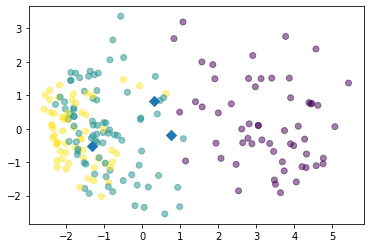

In [113]:
# Assign the columns of new_points to xs and ys
xs = pca_samples[:,0]
ys = pca_samples[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys, c=labels, alpha=0.5)

# Assign the cluster centers from the model km
centroids = km.cluster_centers_

# Assign the columns of centroids to centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y, marker="D", s=50)
plt.show()